# Robust Linear Regression

October 2024

Joel Dieguez and Clàudia Valverde

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction

This practical focuses on data regression methods. We will focus on some of the basic
methods and on the relevance of the error assessment metrics to ensure robustness against
outliers. Note that this practical is concerned with unconstrained optimization only.

## Your Task

### 1.1.
Implement the method proposed with gradient descent and backtracking (or a small constant $\alpha$ value). You may check your method with a randomly generated set of points

```
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
```
The `angle` value, as well as the `lamb` matrix, allow us to control the shape of the random values generated.

Compute the parameters associated to the model and draw the lines that is obtained with the set of points

In [2]:
def Q(w0, w1, x, y):
  # LSM loss
  loss = 0
  for i in range(len(x)):
    loss += (w0 * x[i] + w1 - y[i])**2
  return loss / 2

def grad_Q(w0, w1, x, y):
    # gradient of LSM loss
    loss_w0 = 0
    loss_w1 = 0
    for i in range(len(x)):
        loss_w0 += (w0 * x[i] + w1 - y[i]) * x[i]
        loss_w1 += (w0 * x[i] + w1 - y[i])
    return np.array([loss_w0, loss_w1])

In [3]:
def point_generator(outliers=0):
    # Randomly generated set of points
    m = [0.,0.]
    angle = 45*math.pi/180
    rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
    math.cos(angle)]])
    lamb = np.array([[100,0],[0,1]])
    s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
    points = np.random.multivariate_normal(m,s,100)
    if outliers == 1:
      points[1] = [-40, 20]
    elif outliers > 1:
      for i in range(outliers):
        #rand_index = np.random.randint(0, len(points))
        p0 = np.random.uniform(low=-50, high=50, size = (1,))
        p1 = np.random.uniform(low=-100, high=100, size = (1,))
        point = np.array([p0[0], p1[0]])
        points = np.vstack((points, point))
    #return points
    x = points[:,0]
    y = points[:,1]
    return x, y

In [4]:
# Gradient descent with backtracking algorithm
def SGD(x, y, alpha_inicial, w_initial, k=100, Q=Q, grad_Q=grad_Q, verbose=False, verbose_last=False, abs_cond=1e-3, norm_cond=1e-5):
    w = [w_initial]
    if verbose: print("w0 = ", w[-1])

    for i in range(1, k+1):
        alpha = alpha_inicial
        fw = Q(w[-1][0], w[-1][1], x, y)
        w_new =  w[-1] - alpha * grad_Q(w[-1][0], w[-1][1], x, y)
        while(Q(w_new[0], w_new[1], x, y) >= fw):
            alpha *= 0.5
            w_new =  w[-1] - alpha * grad_Q(w[-1][0], w[-1][1], x, y)

        w.append(w_new)
        if verbose: print(f"w{i} = {w[-1]}")
        if verbose: print(f"loss: {Q(w[-1][0], w[-1][1], x, y)}")

        # Stopping criterion
        if abs(fw - Q(w_new[0], w_new[1], x, y)) < abs_cond or np.linalg.norm(grad_Q(w_new[0], w_new[1], x, y)) < norm_cond:
            if verbose or verbose_last: print("Stopping criterion met")
            if verbose_last: print(f"w{i} = {w[-1]}")
            return w

    if verbose_last: print(f"w{i} = {w[-1]}")
    return w

In [5]:
x, y = point_generator()

In [6]:
# checking the algorithm and the randomly generated points work correctly
w = SGD(x, y, 1, [0,0], 100, verbose=True, verbose_last=False)

w0 =  [0, 0]
w1 = [ 1.09706136 -0.0078486 ]
loss: 98.15563222607892
w2 = [ 0.99405535 -0.00782786]
loss: 78.4651029657946
w3 = [ 1.00372185 -0.00852851]
loss: 78.28990187321331
w4 = [ 1.00189779 -0.00976029]
loss: 78.28744537957557
w5 = [ 1.00404696 -0.01095746]
loss: 78.28554329099335
w6 = [ 1.00147766 -0.01206609]
loss: 78.28427467290867
w7 = [ 1.00451366 -0.01315655]
loss: 78.28376521218593
Stopping criterion met


In [7]:
# defining a general function for future plots of the randomly generated points and the fitted line
def plot_LR(x, y, w, title='Linear Regression Fit'):
  # Linear regression parameters (w1: slope, w0: intercept)
  w0 = w[1]
  w1 = w[0]

  # Plot the data points
  plt.scatter(x, y, color='blue', label='Data points')

  # Create the regression line: y_pred = w1 * x + w0
  x_line = np.linspace(min(x), max(x), 100)  # Generate 100 points between min(x) and max(x)
  y_line = w1 * x_line + w0

  # Plot the regression line
  plt.plot(x_line, y_line, color='red', label=f'Linear regression: y = {w1.round(2)}x + {w0.round(2)}')

  # Add labels and legend
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(title)
  plt.legend()

  # Display the plot
  plt.show()

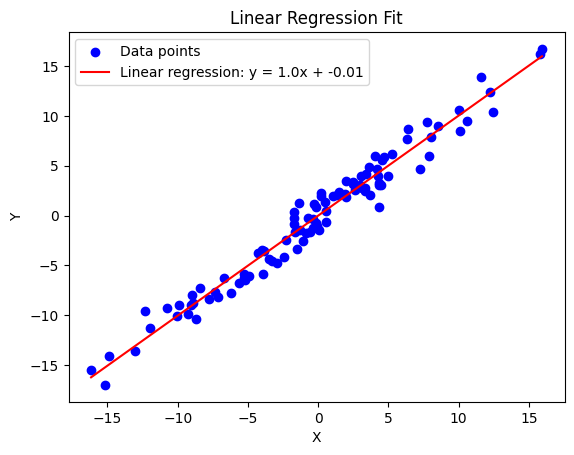

In [8]:
plot_LR(x, y, w[-1])

### 1.2.
Let us now check the sensitivity of the method to outliers, that is, points that do not follow
the model. Using a set of points generate with an angle of 45 degrees, change the value of
one point to a value “far away” from the set of points, for instance `points[1] = [-40,20]`

Draw the line that approximates the set of points and observe that one point may have a large
influence in the obtained solution.
Change now other points of the original dataset to assess the influence of outliers.
Outliers are common when performing most data analyses. Thus, it is important to use robust
functions for outliers in order to obtain the expected result

Stopping criterion met
w74 = [0.61824486 0.65159614]


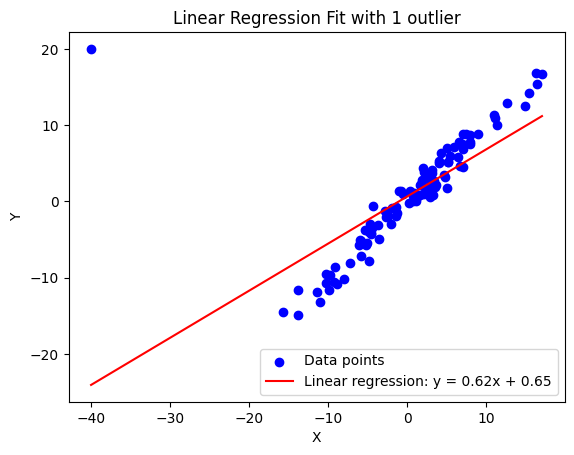

In [9]:
# With 1 outlier

x, y = point_generator(outliers=1)

w = SGD(x, y, 1, [0,0], 100, verbose_last=True)
plot_LR(x, y, w[-1], title='Linear Regression Fit with 1 outlier')

Stopping criterion met
w46 = [0.35064743 1.02964705]


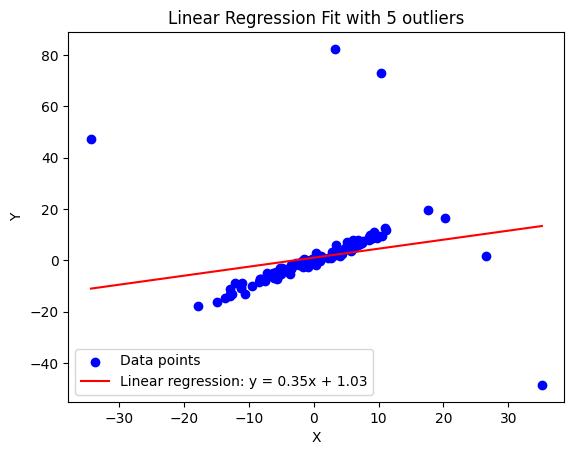

Stopping criterion met
w83 = [ 1.18382249 -0.55470233]


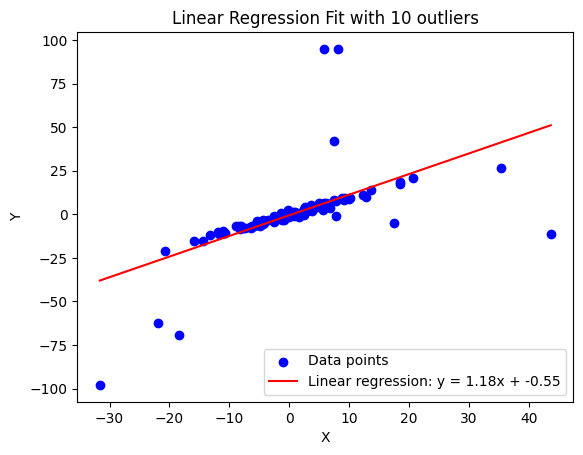

w100 = [-0.30555456  0.69300644]


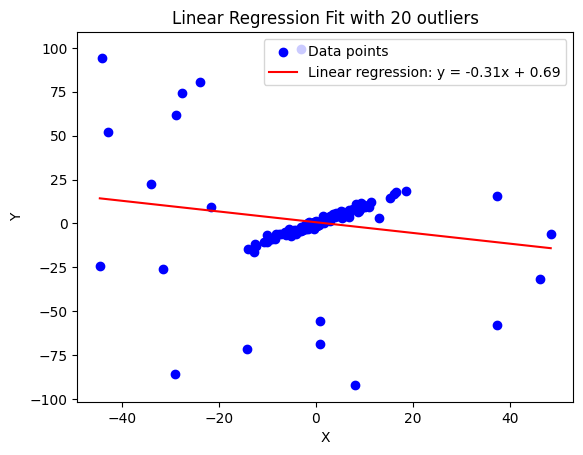

w100 = [ 0.20723959 -0.45887837]


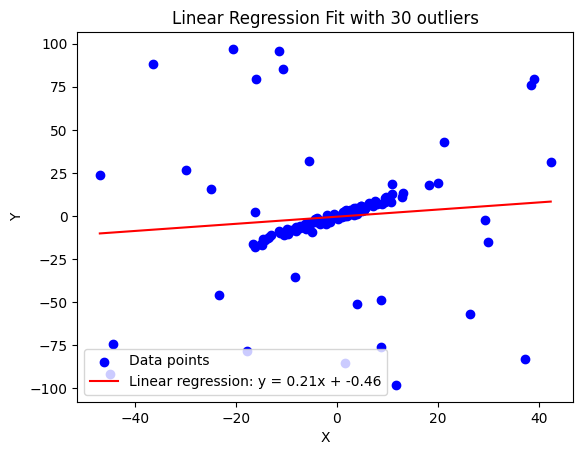

In [10]:
for num_outliers in [5, 10, 20, 30]:
  x, y = point_generator(outliers=num_outliers)

  w = SGD(x, y, 1, [0,0], 100, verbose_last=True)
  plot_LR(x, y, w[-1], title=f'Linear Regression Fit with {num_outliers} outliers')

**Comments on the plots:**

We can observe that outliers have big impact on the fitness of the regression line to the dataset.

## 2. Robust functions

## Your Task
For simplicity, assume c = 1 for the Cauchy function (you may use the set of points with a 45 degrees)

In [11]:
# defining Cauchy function
def cauchy(u, c=1):
  return c**2 / 2 * np.log(1 + (u/c)**2)

### 2.1

Plot the least squares function, $ρ(u) = \frac{1}{2}u^2$, and compare it with the Cauchy function, Eq.(2), in order to see the “importance” given to each prediction error $u$, you may, for instance, plot the function $ρ(u)$ for $|u| ≤ 10$.

In [12]:
# defining lse function
def lse(u):
  return u**2 / 2

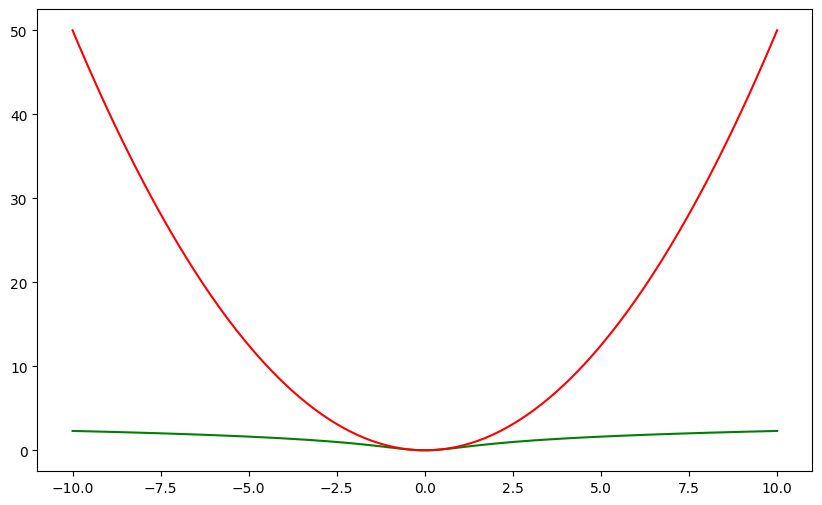

In [13]:
u = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(u, cauchy(u), 'green')
plt.plot(u, lse(u), 'red')

**Comments on the plot:**

We can clearly see the difference in their behaviours, LSE (in red) is much more steep and Cauchy  (in green) much more soft. This means that LSE penalizes hardly the points further from the precition (outliers), on the other hand, we can think that the Cauchy function as the error function may help the model adapt better in the presence of outliers.

### 2.2

Implement the algorithm that allows to compute the parameters $w_0$ and $w_1$ using the Cauchy function. For that issue you can use the backtracking gradient descent method (there is no need to use the Newton method).

Using the chain rule:

$$u(w_0, w_1) = w_0 · x + w_1$$
$$ρ(u) = \frac{c^2}{2}log[1+(\frac{u}{c})^2]$$

$$\frac{d ρ}{d w_0} = \frac{d ρ}{d u} · \frac{d u}{d w_0} = \sum \frac{u}{1+(\frac{u}{c})^2} · x$$

$$\frac{d ρ}{d w_1} = \frac{d ρ}{d u} · \frac{d u}{d w_1} = \sum \frac{u}{1+(\frac{u}{c})^2} · 1$$

In [14]:
# definig the necessary functions for the gradient and loss

def Q_cauchy(w0, w1, x, y, c=1):
  # Cauchy loss
  loss = 0
  for i in range(len(x)):
    u = w0 * x[i] + w1 - y[i]
    loss += cauchy(u, c=c)
  return loss / 2

def grad_Q_cauchy(w0, w1, x, y, c=1):
    loss_w0 = 0
    loss_w1 = 0
    for i in range(len(x)):
        u = w0 * x[i] + w1 - y[i]
        loss_w0 += u / (1+(u/c)**2) * x[i]
        loss_w1 += u / (1+(u/c)**2)
    return np.array([loss_w0, loss_w1])

Stopping criterion met
w8 = [0.94047529 0.00864686]


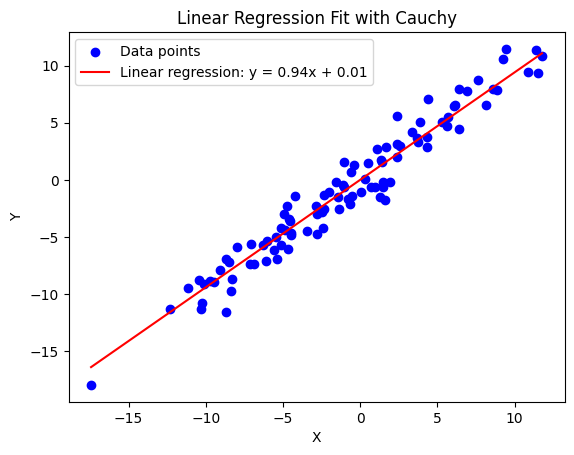

In [15]:
x, y = point_generator()

w = SGD(x, y, 1, [0,0], 100, Q=Q_cauchy, grad_Q=grad_Q_cauchy, verbose_last=True)
plot_LR(x, y, w[-1], title='Linear Regression Fit with Cauchy')

**Comments on the plot:**

We can observe that with the Couchy function the regression line also fits the dataset without outliers.

### 2.3
Compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

In [16]:
def plot_both(x, y, w_lse, w_cauchy, title='Linear Regression Fit'):
    # Linear regression parameters for LSE (w1: slope, w0: intercept)
    w0_lse = w_lse[1]
    w1_lse = w_lse[0]

    # Linear regression parameters for Cauchy (w1: slope, w0: intercept)
    w0_cauchy = w_cauchy[1]
    w1_cauchy = w_cauchy[0]

    # Plot the data points
    plt.scatter(x, y, color='blue', label='Data points')

    # Generate points for the x-axis
    x_line = np.linspace(min(x), max(x), 100)

    # Compute predictions for LSE line: y_pred_lse = w1_lse * x + w0_lse
    y_line_lse = w1_lse * x_line + w0_lse
    plt.plot(x_line, y_line_lse, color='red', label=f'LSE: y = {w1_lse:.2f}x + {w0_lse:.2f}')

    # Compute predictions for Cauchy line: y_pred_cauchy = w1_cauchy * x + w0_cauchy
    y_line_cauchy = w1_cauchy * x_line + w0_cauchy
    plt.plot(x_line, y_line_cauchy, color='green', label=f'Cauchy: y = {w1_cauchy:.2f}x + {w0_cauchy:.2f}')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.show()

Best parameters found with LSE: [1.00274572 0.16539521]
Best parameters found with Cauchy: [0.98636583 0.07568275]


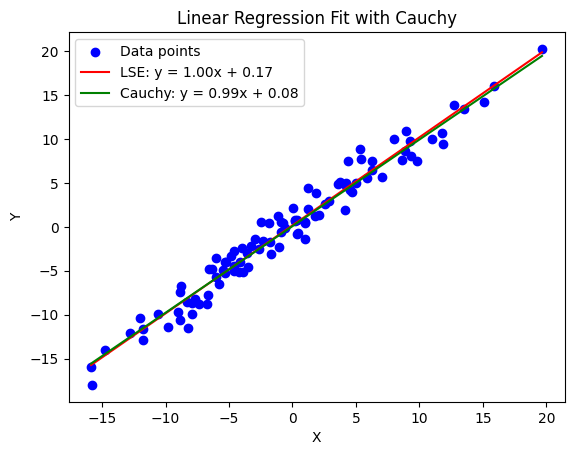

In [17]:
x, y = point_generator()

w_lse = SGD(x, y, 1, [0,0], 100, Q=Q, grad_Q=grad_Q)
print(f"Best parameters found with LSE: {w_lse[-1]}")

w_cauchy = SGD(x, y, 1, [0,0], 100, Q=Q_cauchy, grad_Q=grad_Q_cauchy)
print(f"Best parameters found with Cauchy: {w_cauchy[-1]}")

plot_both(x, y, w_lse[-1], w_cauchy[-1], title='Linear Regression Fit with Cauchy')

**Comments on the plot:**

In the absence of outliers, both approximations are very good, they are almost the same line.

### 2.4
Compare now the results with only one outlier. You may proceed as previously proposed. The Cauchy function should be more robust than the quadratic function.

Best parameters found with LSE: [0.59994279 0.15714737]
Best parameters found with Cauchy: [ 1.00791146 -0.12720536]


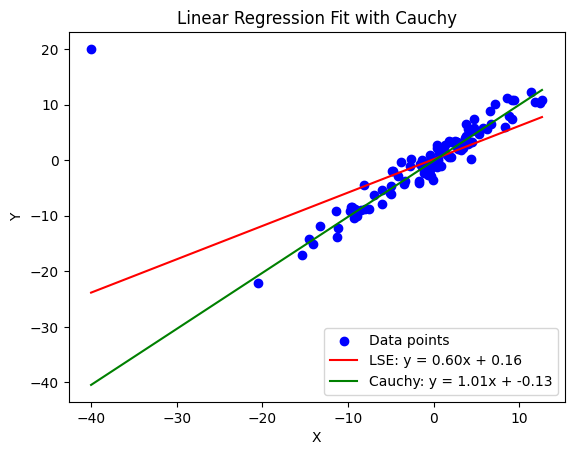

In [18]:
x, y = point_generator(outliers=1)

w_lse = SGD(x, y, 1, [0,0], 100, Q=Q, grad_Q=grad_Q)
print(f"Best parameters found with LSE: {w_lse[-1]}")

w_cauchy = SGD(x, y, 1, [0,0], 100, Q=Q_cauchy, grad_Q=grad_Q_cauchy)
print(f"Best parameters found with Cauchy: {w_cauchy[-1]}")

plot_both(x, y, w_lse[-1], w_cauchy[-1], title='Linear Regression Fit with Cauchy')

**Comments on the plot:**

Now we can clearly see the difference. The Cauchy approximation is much more true to the data, more roboust, and it properly ignores the outlier.

### 2.5
Test the influence of the parameter c in the parameters obtained. You may, for instance, check the results obtained with $c = 1$, $c = 100$, $c = 1/100$ and $c = 1/1000$. Can you reason why of these results? To this end, you are recommended to plot the histogram of the error function $|u|$ (its absolute value of u) and to compare with the shape corresponding $ρ(u)$ functions.
Consider performing a “zoom” of the Cauchy function to see the interval at which the function behaves as a quadratic function. Which values are considered as “inliers” / “outliers”?

In [19]:
# To simplify the code, we will use a class to define the losses

class CauchyLoss:
    def __init__(self, c=1):
        """Initialize the Loss class with a parameter c (default: 1)."""
        self.c = c

    def Q(self, w0, w1, x, y):
      # Cauchy loss
      loss = 0
      for i in range(len(x)):
        u = w0 * x[i] + w1 - y[i]
        loss += cauchy(u, c=self.c)
      return loss / 2

    def grad_Q(self, w0, w1, x, y):
        loss_w0 = 0
        loss_w1 = 0
        for i in range(len(x)):
            u = w0 * x[i] + w1 - y[i]
            loss_w0 += u / (1+(u/self.c)**2) * x[i]
            loss_w1 += u / (1+(u/self.c)**2)
        return np.array([loss_w0, loss_w1])

In [20]:
def plot_error_histogram(x, y, w0, w1, title=''):
    errors = np.abs(w0 * x + w1 - y)
    plt.hist(errors, bins=20, color="purple", alpha=0.7)
    plt.title(f"Histogram of |u| for {title}")
    plt.xlabel("|u| (absolute error)")
    plt.ylabel("Frequency")
    plt.show()

Stopping criterion met
w5 = [ 1.00072882 -0.01512226]


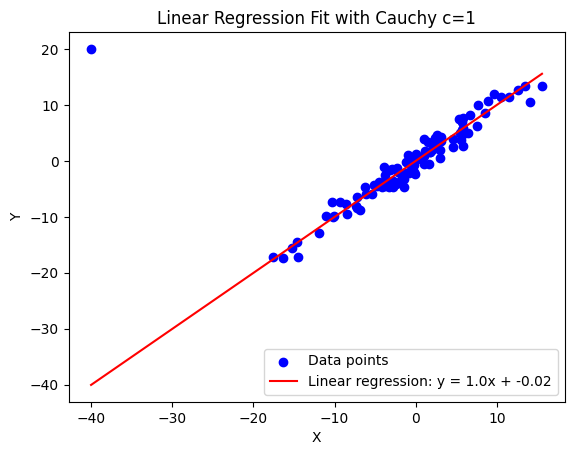

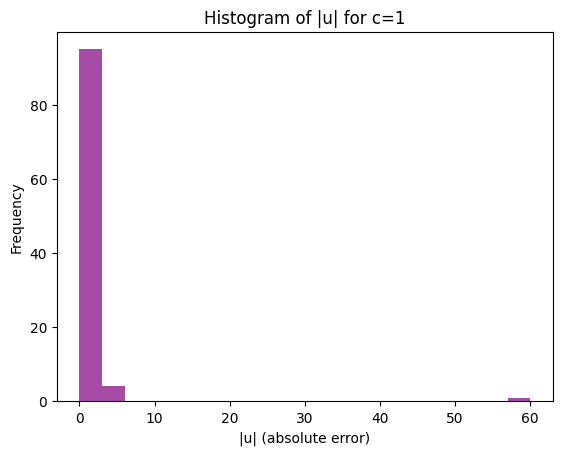

Stopping criterion met
w24 = [0.65287635 0.06657399]


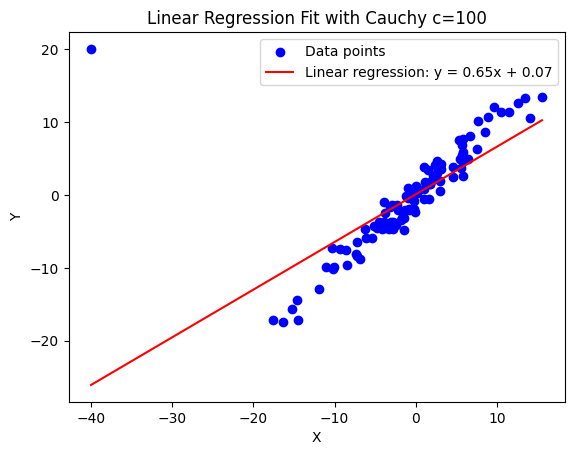

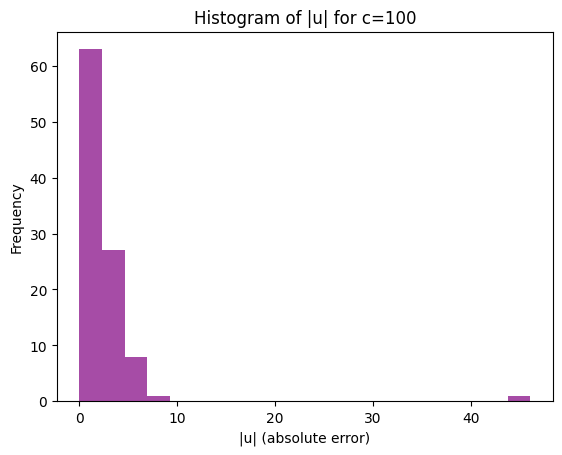

Stopping criterion met
w1 = [ 9.26386582e-03 -1.06094374e-05]


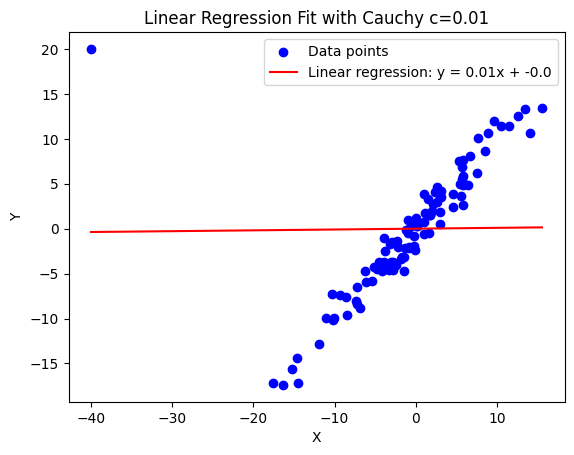

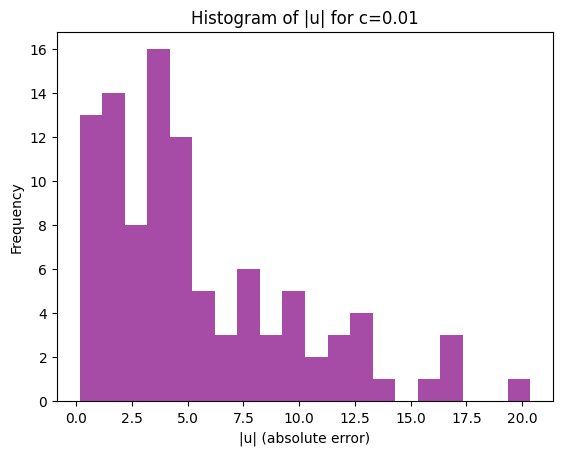

Stopping criterion met
w1 = [ 9.26642834e-05 -1.17187034e-07]


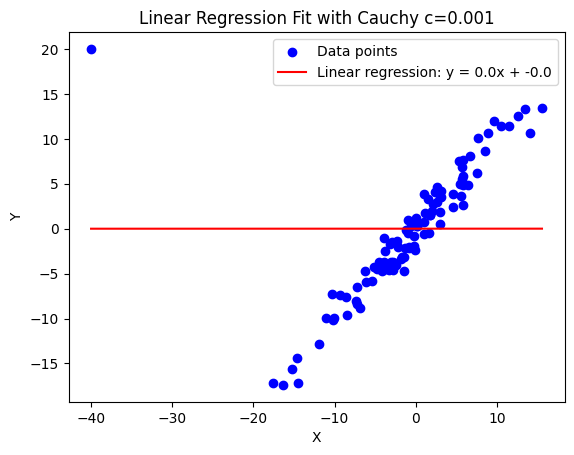

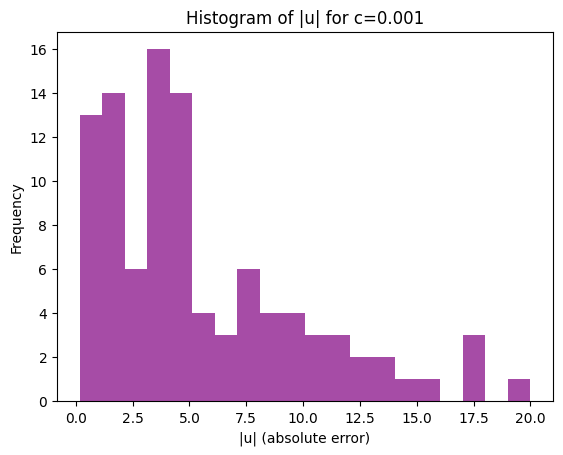

In [21]:
x, y = point_generator(outliers=1)

for c in [1, 100, 1/100, 1/1000]:
    cl = CauchyLoss(c=c)

    w = SGD(x, y, 1, [0,0], 100, Q=cl.Q, grad_Q=cl.grad_Q, verbose_last=True)
    plot_LR(x, y, w[-1], title=f'Linear Regression Fit with Cauchy c={c}')
    # Plot the histogram of |u|
    plot_error_histogram(x, y, w[-1][0], w[-1][1], title=f'c={c}')

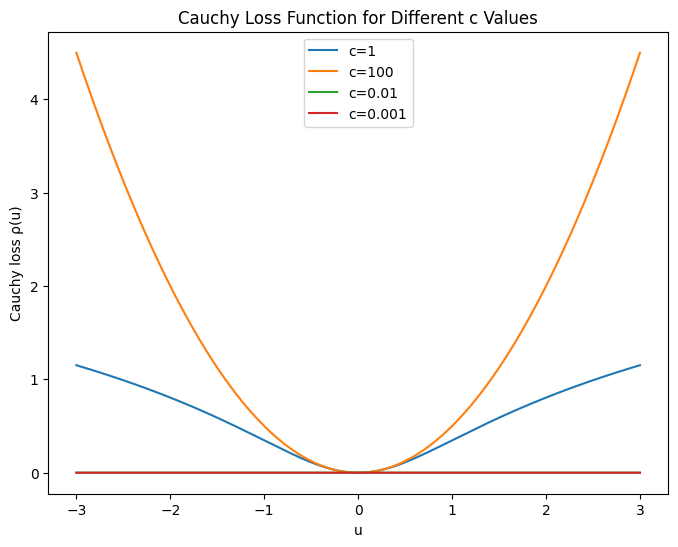

In [22]:
# Visualize the Cauchy function for different c values
u_vals = np.linspace(-3, 3, 500)
plt.figure(figsize=(8, 6))
for c in [1, 100, 0.01, 0.001]:

    plt.plot(u_vals, cauchy(u_vals, c), label=f'c={c}')
plt.xlabel("u")
plt.ylabel("Cauchy loss ρ(u)")
plt.title("Cauchy Loss Function for Different c Values")
plt.legend()
plt.show()

**Comments on the plots:**

With 1 outlier, for small values of c, the linear regressor fits worse the points than for bigger values of c, as 1 or 100. With 100, we obtain a similar result to using LSE. Then, for very small values of c, it tends to almost ignore all points and generate a horizontal line.

In the histograms we observe how the importance each c value gives to the errors. c=1 is the one with the most point in minimal error range, while at the same time having 1 outlier with error close to 60. As we wanted, it has ignored this outlier. c=100 is working fine but not as correct, it is trying to reduce the error to the outlier while at the same time worsening the error to the other points. The values c=1/100 and c=1/1000 are so low that they almost ignore the whole error values.

And plotting the Cauchy function for different c we see that the smaller the c, the less quadratic the function behaves being more influenced to outliers.

### 2.6
The Cauchy function is not “perfect”, and it is not robust for any number of outliers. Using $c = 1$ and $c = 1/100$ you may, as before, gradually introduce more number of outliers into the dataset. You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers. Can you comment on the experiments you have
performed?

Stopping criterion met
w6 = [0.9749943  0.01882653]


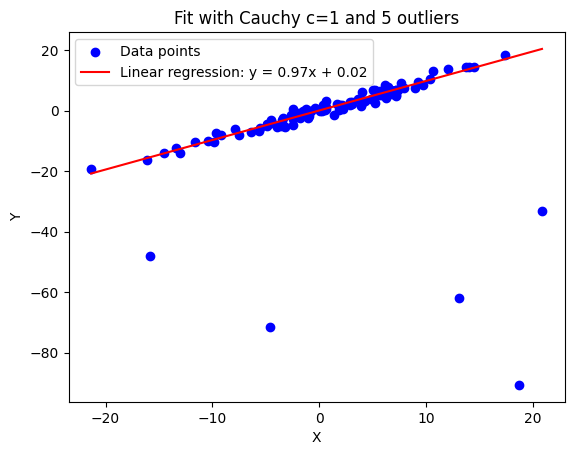

Stopping criterion met
w27 = [ 0.96008394 -0.0590588 ]


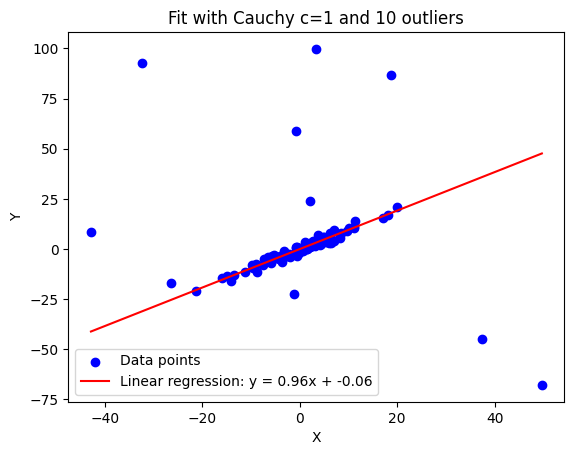

Stopping criterion met
w8 = [0.98704364 0.05390086]


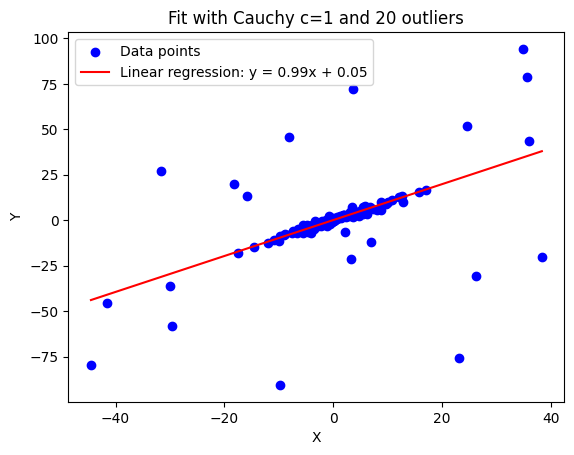

Stopping criterion met
w15 = [ 0.98379058 -0.00104275]


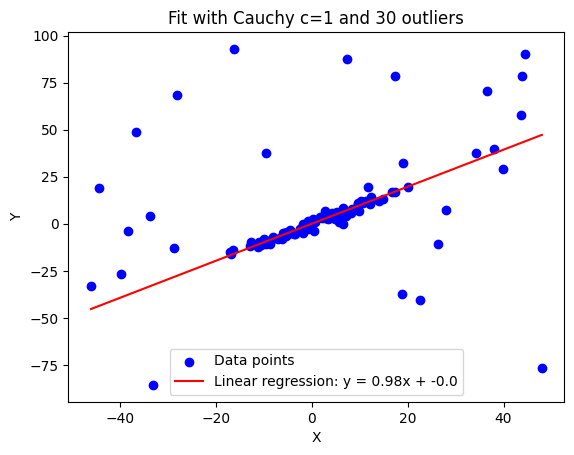

Stopping criterion met
w77 = [0.64688676 0.57951426]


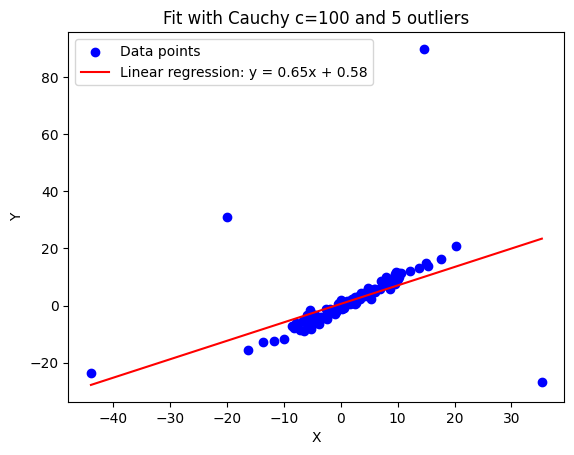

Stopping criterion met
w65 = [ 0.68606277 -0.82308669]


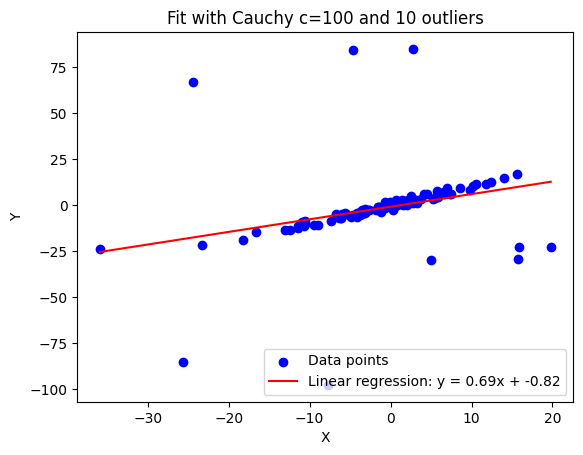

Stopping criterion met
w35 = [0.12293044 0.2790835 ]


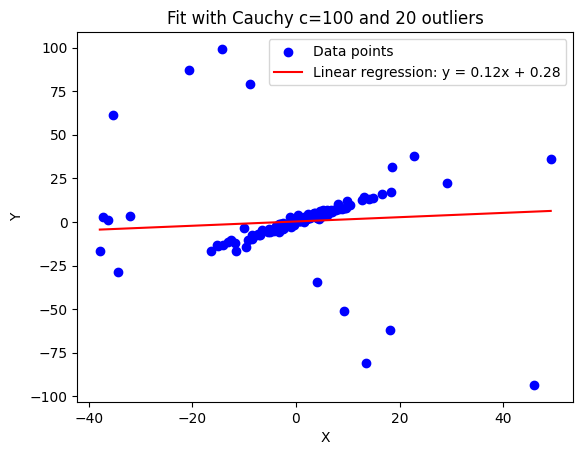

w100 = [0.19784753 1.11081481]


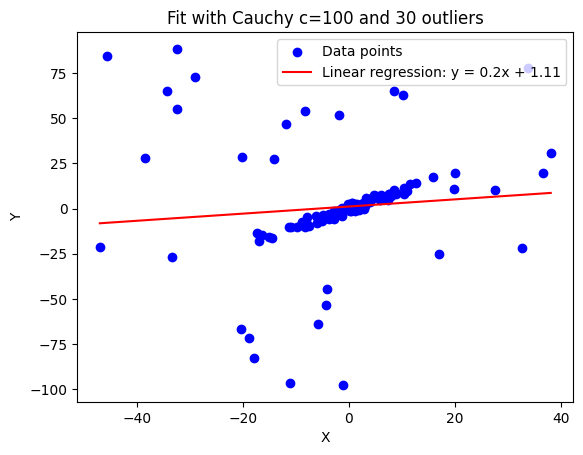

Stopping criterion met
w1 = [ 0.0089612 -0.0002767]


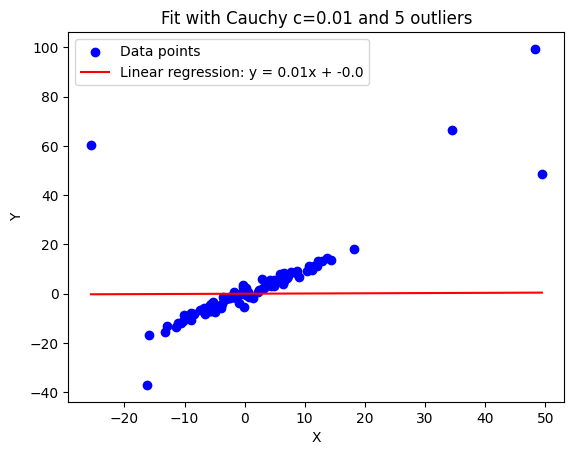

Stopping criterion met
w1 = [ 0.01022789 -0.00117399]


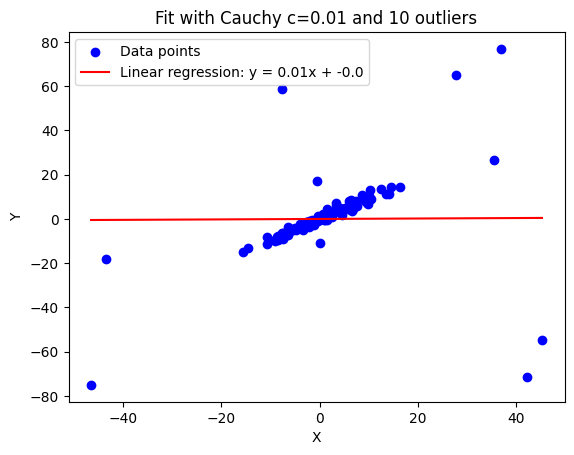

Stopping criterion met
w1 = [0.01112986 0.0029587 ]


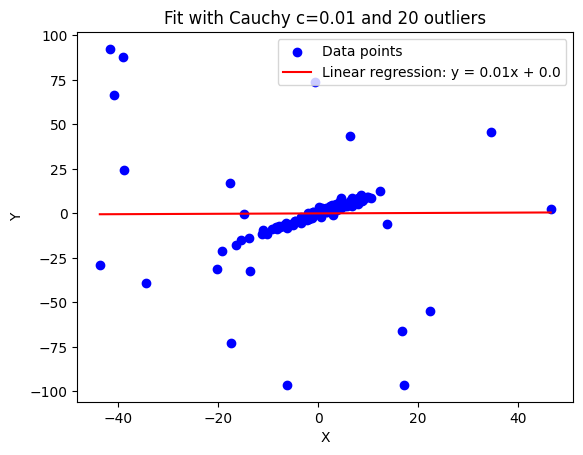

Stopping criterion met
w1 = [0.00645978 0.00464192]


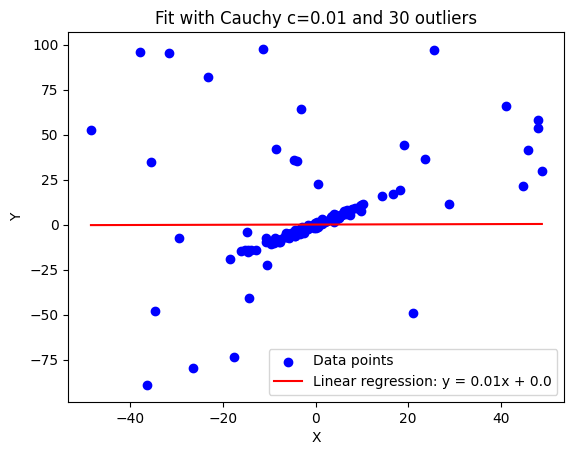

Stopping criterion met
w1 = [8.53635095e-05 2.56468126e-05]


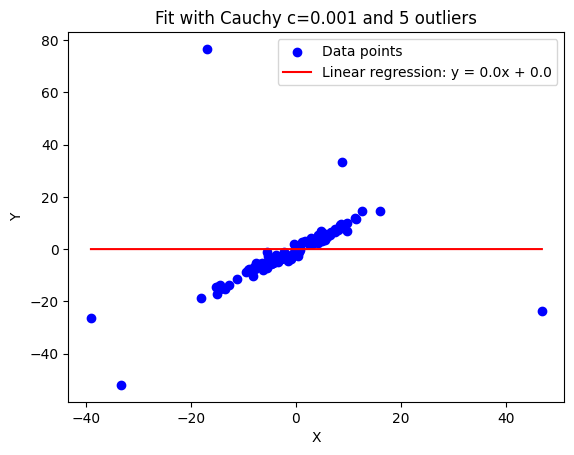

Stopping criterion met
w1 = [ 3.76238767e-06 -4.43152617e-05]


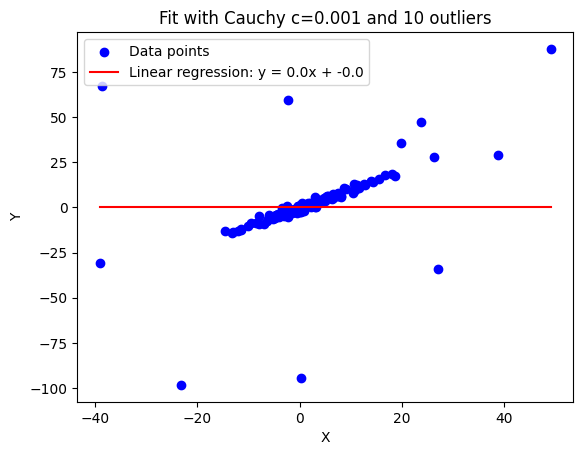

Stopping criterion met
w1 = [1.34547329e-04 3.87866161e-05]


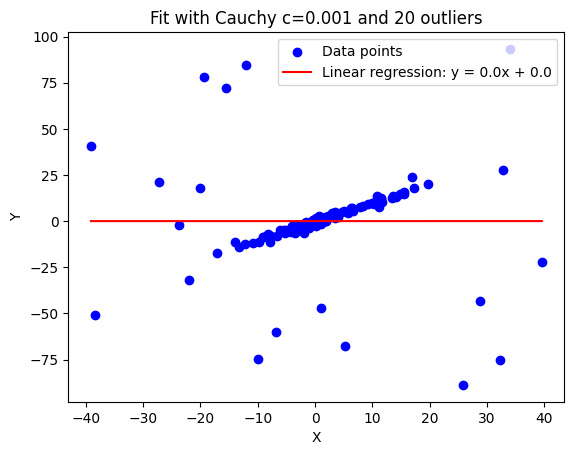

Stopping criterion met
w1 = [1.11090353e-04 4.00197721e-07]


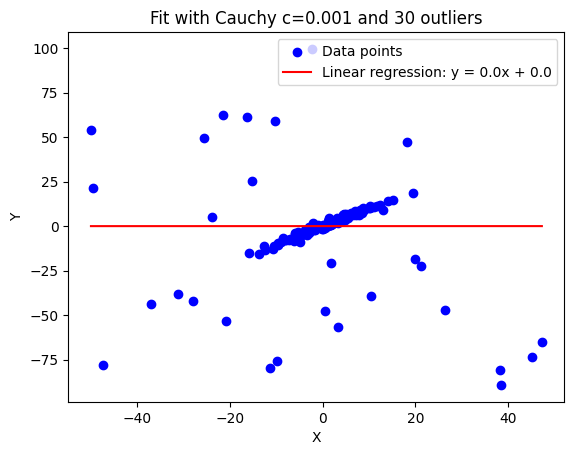

In [23]:
x, y = point_generator(outliers=1)

for c in [1, 100, 1/100, 1/1000]:
    cl = CauchyLoss(c=c)
    for num_outliers in [5, 10, 20, 30]:
        x, y = point_generator(outliers=num_outliers)

        w = SGD(x, y, 1, [0,0], 100, Q=cl.Q, grad_Q=cl.grad_Q, verbose_last=True)
        plot_LR(x, y, w[-1], title=f'Fit with Cauchy c={c} and {num_outliers} outliers')

**Comments:**

We have experimented with values of c = 1, 100, 0.01 and 0.001 and for the number of outliers we hve checked 5, 10, 20 and 30. We observe that for small values of c, the linear regressor does not fit the data even with 10% of outliers. The method is not robust in that case. The method behaves better with larger c but not to much as c=100 as it behaves more quadraticaly and is also more sensitive to outliers. The method perfroms best with c=1 as for the diferent outlier % the method is roboust always fitting the data correctly. For c=100, it focuses too much on the ouliers and for smaller c's, it ignores everything.